In [193]:
import pandas as pd # Inorder To load files and perform tasks
import numpy as np # for the linear algebra
import seaborn as sns  # for the data visualizations
import matplotlib.pyplot as plt # for the data visualizations
import sklearn 
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 
import warnings
warnings.filterwarnings("ignore")

In [194]:
df= pd.read_csv("Glassdoor_DS_Jobs.csv")

In [195]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [196]:
df = df.drop("index",axis=1) 
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [197]:
df_temp = df.assign(CompanyName = df['Company Name'].str.split("\n"))
df_temp = df_temp.CompanyName.apply(pd.Series)
df['Company Name'] = df_temp[0]
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

There are no NULL values in the dataset as can be seen above.

In [199]:
df.describe()

,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [201]:
df['Age'].unique()

array([ 48,  37,  11,  56,  23,  21,  13,  16,   7,  12,  10,  53,  59,
         9, 240,  26, 106,   8,  86, 172,  69, 169,  24,  25,  47,  52,
       151,  36,  -1,   6,  28,  63,  35,  22,  96, 109,  19, 158,  82,
         5, 136,  15,  73,  18,  94,  43, 161,   4,  79,  31,  33,  20,
        14,  29,  27,  44,   2,  39,  84, 143,  55,  50,  78,  34,  76,
       175, 170,  45,  40,  51,  70,  54,  60,  57,  91, 104, 138, 134,
        17, 171, 119, 277,  92,  74,  30,  32,  93, 146, 108,  49, 165,
        38,  99, 209, 107,  41,  67, 191,  46, 122,  42, 132])

In [202]:
avg=np.ceil(df.loc[df['Age'] != -1, 'Age'].mean())
df['Age']=np.where(df['Age'] == -1 , avg, df['Age'])

In [203]:
df['Age'].unique()

array([ 48.,  37.,  11.,  56.,  23.,  21.,  13.,  16.,   7.,  12.,  10.,
        53.,  59.,   9., 240.,  26., 106.,   8.,  86., 172.,  69., 169.,
        24.,  25.,  47.,  52., 151.,  36.,   6.,  28.,  63.,  35.,  22.,
        96., 109.,  19., 158.,  82.,   5., 136.,  15.,  73.,  18.,  94.,
        43., 161.,   4.,  79.,  31.,  33.,  20.,  14.,  29.,  27.,  44.,
         2.,  39.,  84., 143.,  55.,  50.,  78.,  34.,  76., 175., 170.,
        45.,  40.,  51.,  70.,  54.,  60.,  57.,  91., 104., 138., 134.,
        17., 171., 119., 277.,  92.,  74.,  30.,  32.,  93., 146., 108.,
        49., 165.,  38.,  99., 209., 107.,  41.,  67., 191.,  46., 122.,
        42., 132.])

In [204]:
df['Job Location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [205]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [206]:
df['State'] = df['Job Location'].map(lambda x: states.get(x, x))

In [207]:
df[['Job Location', 'State']]

,Job Location,State
0,NM,New Mexico
1,MD,Maryland
2,FL,Florida
3,WA,Washington
4,NY,New York
...,...,...
737,MA,Massachusetts
738,TN,Tennessee
739,PA,Pennsylvania
740,PA,Pennsylvania


In [208]:
df.to_csv('Cleaned_Glassdoor_DS_Jobs.csv', index=False)

In [209]:
df2= df.copy()

In [210]:
df2.drop(df2.loc[df2['Industry']=='-1'].index, inplace=True)

In [211]:
df2.drop(df2.loc[df2['Founded']==-1].index, inplace=True)

In [212]:
df2['Employer provided'].unique()

array([0, 1])

In [213]:
df3= df2[df2['Rating']!=-1]

In [214]:
df2[['Rating', 'Size']]

,Rating,Size
0,3.8,501 - 1000
1,3.4,10000+
2,4.8,501 - 1000
3,3.8,1001 - 5000
4,2.9,51 - 200
...,...,...
736,3.6,10000+
737,3.9,10000+
738,4.4,1001 - 5000
739,2.6,501 - 1000


In [215]:
value = df['Size'].min()
selected_value= df['Size'].unique()
print(value, selected_value)

1 - 50  ['501 - 1000 ' '10000+ ' '1001 - 5000 ' '51 - 200 ' '201 - 500 '
 '5001 - 10000 ' '1 - 50 ' 'unknown']


In [216]:
df_pivot_skills = df[['job_title_sim','Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an','Avg Salary(K)']]

In [217]:
# Checking Average Salary  and counts for each skills
skills = ['Python', 'spark', 'aws', 'excel','sql','sas','keras','pytorch','scikit','tensor','hadoop','tableau','bi','flink','mongo','google_an']
for i in skills:
    a = pd.pivot_table(df_pivot_skills, index = 'job_title_sim', columns = i, values = 'Avg Salary(K)', aggfunc = ['mean','count']).rename(columns={"mean":"Avg Salary(K)"})
    df_skills_append= df.append(a)
    print(a)

                               Avg Salary(K)              count       
Python                                     0           1      0      1
job_title_sim                                                         
Data scientist project manager     69.833333   83.375000   12.0    4.0
analyst                            61.385714   76.790323   70.0   31.0
data analitics                     62.500000   73.300000    3.0    5.0
data engineer                     105.488095  105.357143   42.0   77.0
data modeler                       94.833333   51.500000    3.0    2.0
data scientist                    112.315068  120.112500   73.0  240.0
director                          130.800000         NaN    5.0    NaN
machine learning engineer         124.000000  126.972222    4.0   18.0
na                                 78.250000  111.250000    6.0    4.0
other scientist                    85.496212  118.772727  132.0   11.0
                               Avg Salary(K)              count      
spark  

In [218]:
df2['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 '], dtype=object)

In [219]:
df2['Lower Salary'].unique()

array([ 53,  63,  80,  56,  86,  71,  54,  38, 120, 126,  64, 106,  46,
        83, 102,  67, 118, 110,  81,  73, 109,  75,  34,  72,  93,  85,
        77,  82, 115,  74,  52, 158,  20,  68,  41, 111,  84, 107,  49,
        61,  88,  60,  65, 139,  50,  99,  79,  57,  94,  37, 100,  55,
        39,  31, 117,  40,  89, 200, 121,  76,  91,  95,  43,  29,  26,
       112,  51, 113,  44,  59, 124, 131, 132,  35,  42, 116,  48, 105,
        98, 114, 108,  90, 138, 190,  69,  66,  62,  15, 127,  33,  78,
        45,  70, 130,  92,  36,  97, 202,  32,  87, 101, 125, 150,  47,
       176, 135, 129, 119,  27,  58, 136, 171])

In [220]:
df2['Size'].unique()

array(['501 - 1000 ', '10000+ ', '1001 - 5000 ', '51 - 200 ',
       '201 - 500 ', '5001 - 10000 ', '1 - 50 '], dtype=object)

In [221]:
#Function to calculate the summary
def graph_plot(df,ft1,ft2):
    df1=df.groupby(ft1)[ft2].count()
    df1=df1.reset_index()
    df1.rename(columns={ft2:'Total Count'}, inplace=True)
    df1.sort_values(by=['Total Count'], ascending=False, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    return df1

#Function to plot the histogram
def hist_plot(df,yval, xval, ylabel, xlabel, title):
    y_no=np.arange(len(df[yval]))
    plt.figure(figsize=(10,8))
    plt.bar(y_no,df[xval], align='center', alpha=0.5, color='#0072BD')
    plt.xticks(y_no, df[yval],rotation='vertical')
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    plt.title(title, size=16, color='black')
    plt.show() 

#Function to plot the multiple histogram
def group_hist_plot(df,df_hg, yval,xlabel, title):
    df1=df[[yval, 'Lower Salary', 'Upper Salary', 'Avg Salary(K)']]
    df1_summary=df1.groupby(yval).agg({'Lower Salary':'mean','Upper Salary':'mean', 'Avg Salary(K)':'mean'})
    df1_summary.reset_index(drop=False, inplace=True)
    if(df_hg.shape != df.shape):
        df1_summary=pd.merge(df1_summary, df_hg[[yval]], on=yval, how="inner")

    
    width=0.25
    ind=np.arange(len(df1_summary[yval]))
    plt.figure(figsize=(10,10))
    bar1 = plt.bar(ind, df1_summary['Lower Salary'], width, color = '#D95319')
    bar2 = plt.bar(ind+width, df1_summary['Upper Salary'], width, color='#77AC30')
    bar3 = plt.bar(ind+width*2, df1_summary['Avg Salary(K)'], width, color='#0072BD')
    
    plt.xlabel(xlabel, size=13)
    plt.ylabel('Salary($K)', size=13)
    plt.title(title, size=15, color='black')
    plt.xticks(ind+width, df1_summary[yval],rotation='vertical')
    plt.legend( (bar1, bar2, bar3), ('Minimum Salary', 'Maximum Salary', 'Average Salary') )
    plt.show()    
    
    #multiple_plot_hist(df,industry_job_top,'Industry',"Industry", "Minimum/Maximum/Average for Top 10 Industry")
    

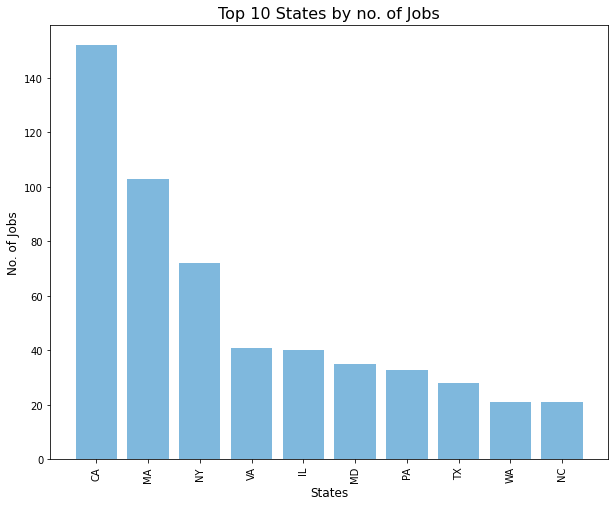

In [222]:
#Grpah the States by Number of Jobs
states_jobs=graph_plot(df,'Job Location','Job Title') 
#Plot the top 10 states with high no of jobs
states_job_top= states_jobs[0:10]
#Plot the histogram for the top 10 states with maximum number of jobs posted
hist_plot(states_job_top,'Job Location','Total Count','No. of Jobs','States','Top 10 States by no. of Jobs')

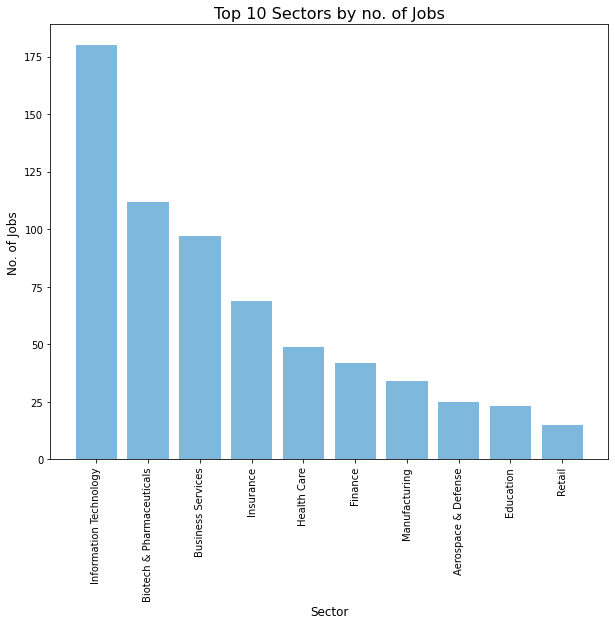

In [223]:
df['Sector'].nunique()
sector_job=graph_plot(df,'Sector','Job Title') 
sector_job_top=sector_job[0:10]

#Plot the histogram for the top 10 Sectors with maximum number of jobs posted
hist_plot(sector_job_top,'Sector','Total Count','No. of Jobs','Sector','Top 10 Sectors by no. of Jobs')

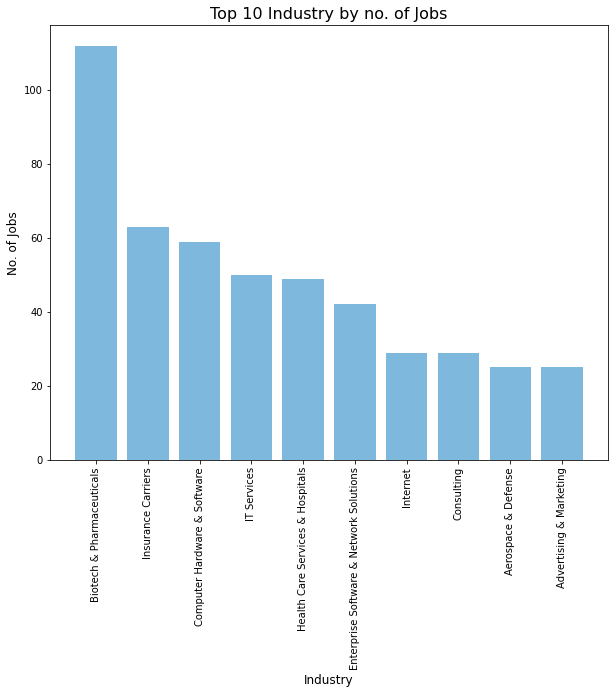

In [224]:
df['Industry'].nunique()

industry_job=graph_plot(df,'Industry','Job Title') 
industry_job_top=industry_job[0:10]

#Plot the histogram for the top 10 Industry with maximum number of jobs posted
hist_plot(industry_job_top,'Industry','Total Count','No. of Jobs','Industry','Top 10 Industry by no. of Jobs')

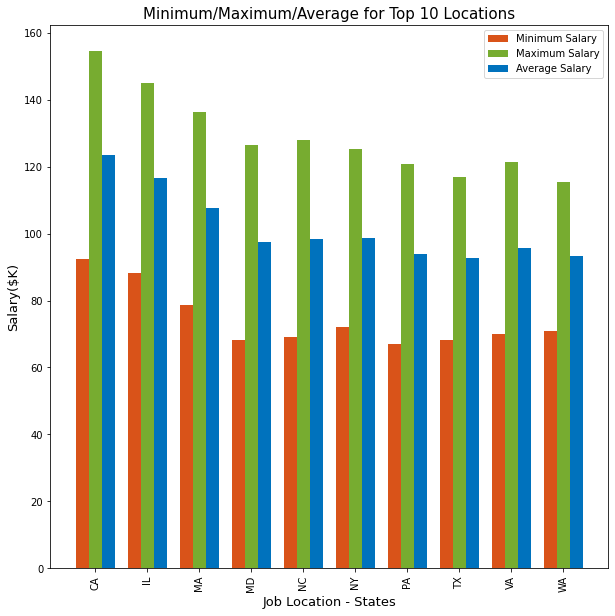

In [225]:
#Salary Split in Top 10 location - Maximum,Mininum and Average
group_hist_plot(df,states_job_top,'Job Location',"Job Location - States", "Minimum/Maximum/Average for Top 10 Locations")

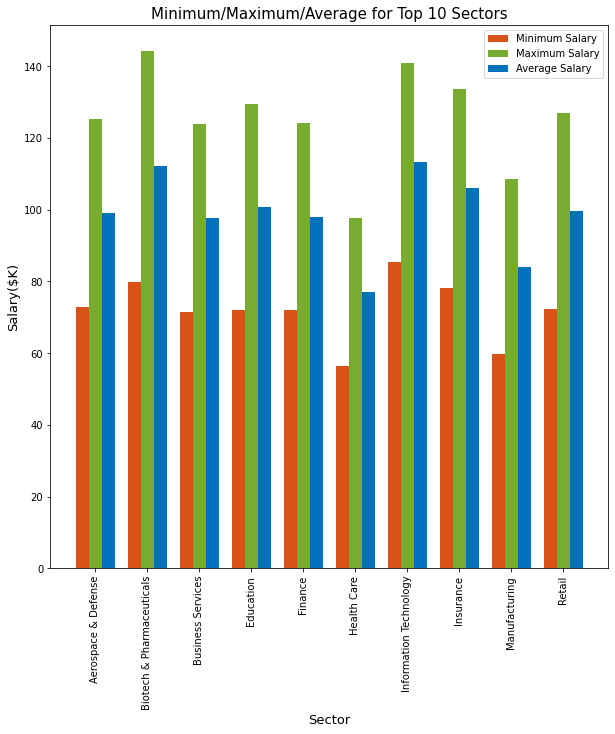

In [226]:
#Salary split across top sectors - Maximum, Minimum and Average
group_hist_plot(df,sector_job_top,'Sector',"Sector", "Minimum/Maximum/Average for Top 10 Sectors")

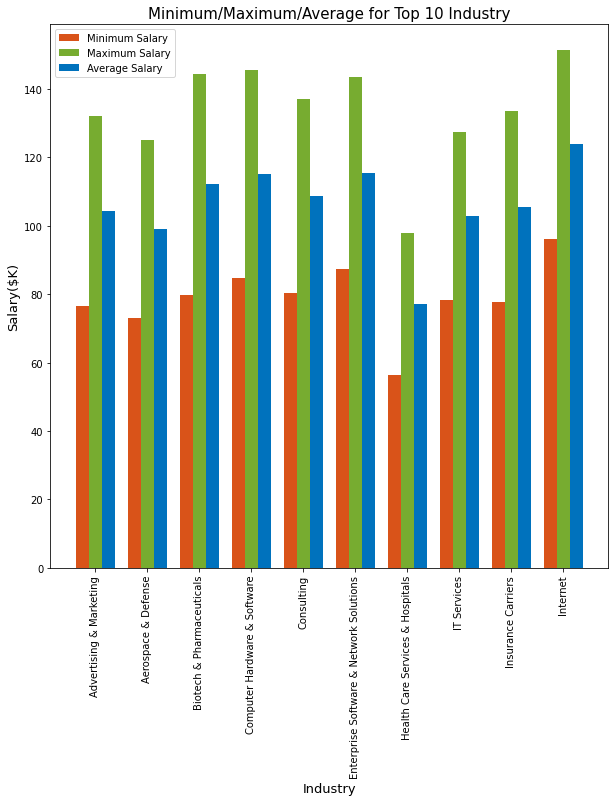

In [227]:
#Industry Split across top industries - Maximum,Minimum and Average
group_hist_plot(df,industry_job_top,'Industry',"Industry", "Minimum/Maximum/Average for Top 10 Industry")
#Maximum Salary is paid in IT and Biotech Sector

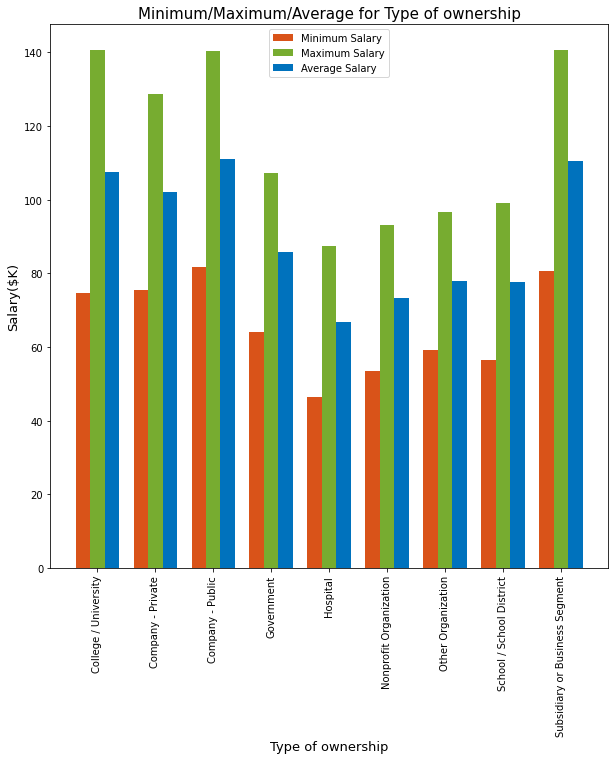

In [228]:
#Is there a difference in the salary based on the type of ownership
sal_own=df[['Type of ownership', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)']]
sal_own_summary=sal_own.groupby('Type of ownership').agg({'Lower Salary':'mean','Upper Salary':'mean', 'Avg Salary(K)':'mean'})
sal_own_summary.reset_index(drop=False, inplace=True)
group_hist_plot(df,df,'Type of ownership',"Type of ownership", "Minimum/Maximum/Average for Type of ownership")

In [229]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
-1                                           10
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing           

In [230]:
df = df[df.Industry != '-1']
df = df[df.Sector != '-1']

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           732 non-null    object 
 1   Salary Estimate     732 non-null    object 
 2   Job Description     732 non-null    object 
 3   Rating              732 non-null    float64
 4   Company Name        732 non-null    object 
 5   Location            732 non-null    object 
 6   Headquarters        732 non-null    object 
 7   Size                732 non-null    object 
 8   Founded             732 non-null    int64  
 9   Type of ownership   732 non-null    object 
 10  Industry            732 non-null    object 
 11  Sector              732 non-null    object 
 12  Revenue             732 non-null    object 
 13  Competitors         732 non-null    object 
 14  Hourly              732 non-null    int64  
 15  Employer provided   732 non-null    int64  
 16  Lower Sa

In [232]:
df['Degree'].unique()

array(['M', 'na', 'P'], dtype=object)

In [233]:
df['Industry'].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing                 8
Financial Analytics & Research          

In [234]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,State
737,229,205,346,3.9,129,30,24,1,1830,2,...,0,0,0,0,0,0,9,2,0,17
738,189,292,362,4.4,111,119,156,2,2006,2,...,1,0,0,0,0,0,3,2,2,31
739,155,196,366,2.6,266,141,134,5,1984,0,...,0,0,0,0,0,0,9,1,1,28
740,66,397,121,3.2,203,7,34,0,-1,1,...,0,0,0,0,0,0,5,1,2,28
741,166,226,317,3.6,242,19,6,5,1967,5,...,0,0,0,0,0,0,9,1,0,26


In [235]:
corr = df.corr(method='pearson')
corr

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,State
Job Title,1.000000,-0.032224,0.079552,-0.143663,0.040573,-0.017230,-0.043810,-0.058417,0.063523,0.027997,...,-0.054293,-0.067912,-0.020848,0.070957,-0.035588,-0.032222,0.280816,0.593985,-0.122832,0.011135
Salary Estimate,-0.032224,1.000000,0.055765,-0.062676,-0.026147,-0.086065,-0.111916,-0.021683,-0.089629,-0.078730,...,0.060831,0.083126,-0.032897,-0.036440,0.100721,-0.035751,-0.008673,-0.025194,-0.021561,0.117307
Job Description,0.079552,0.055765,1.000000,-0.070282,0.118757,-0.038145,-0.023402,-0.004198,-0.042762,0.153003,...,0.052013,0.054864,0.026577,0.017317,0.010973,-0.005777,0.017745,0.026762,0.009958,-0.121969
Rating,-0.143663,-0.062676,-0.070282,1.000000,0.031998,-0.092670,-0.043694,0.108750,0.101533,-0.035254,...,0.147551,-0.018293,0.025384,0.052077,0.025146,-0.037964,-0.154746,-0.012944,0.069651,-0.028756
Company Name,0.040573,-0.026147,0.118757,0.031998,1.000000,-0.049281,0.088430,-0.020865,-0.022616,0.023344,...,0.003831,-0.015310,-0.050465,-0.009704,0.043253,0.024843,0.080867,0.053544,-0.014092,0.044467
Location,-0.017230,-0.086065,-0.038145,-0.092670,-0.049281,1.000000,0.602321,0.055757,-0.012248,0.060685,...,-0.073132,-0.068439,-0.073103,0.002208,-0.105818,0.015350,-0.044276,0.004802,-0.014213,-0.136650
Headquarters,-0.043810,-0.111916,-0.023402,-0.043694,0.088430,0.602321,1.000000,0.068608,0.105064,0.002234,...,0.003229,-0.084968,-0.100502,0.036694,-0.024120,0.016167,0.009213,-0.031073,-0.045059,-0.077696
Size,-0.058417,-0.021683,-0.004198,0.108750,-0.020865,0.055757,0.068608,1.000000,0.094463,-0.099472,...,-0.053641,-0.007355,-0.020559,0.046545,-0.026740,-0.041612,-0.076195,-0.047173,0.175964,-0.138464
Founded,0.063523,-0.089629,-0.042762,0.101533,-0.022616,-0.012248,0.105064,0.094463,1.000000,-0.043694,...,0.003415,0.053488,0.045444,0.036016,0.051530,0.041424,-0.025636,0.114502,-0.052630,-0.040231
Type of ownership,0.027997,-0.078730,0.153003,-0.035254,0.023344,0.060685,0.002234,-0.099472,-0.043694,1.000000,...,-0.045756,0.099272,0.049627,-0.007371,0.022765,0.037985,0.062953,0.012144,-0.015568,-0.004668


<AxesSubplot: >

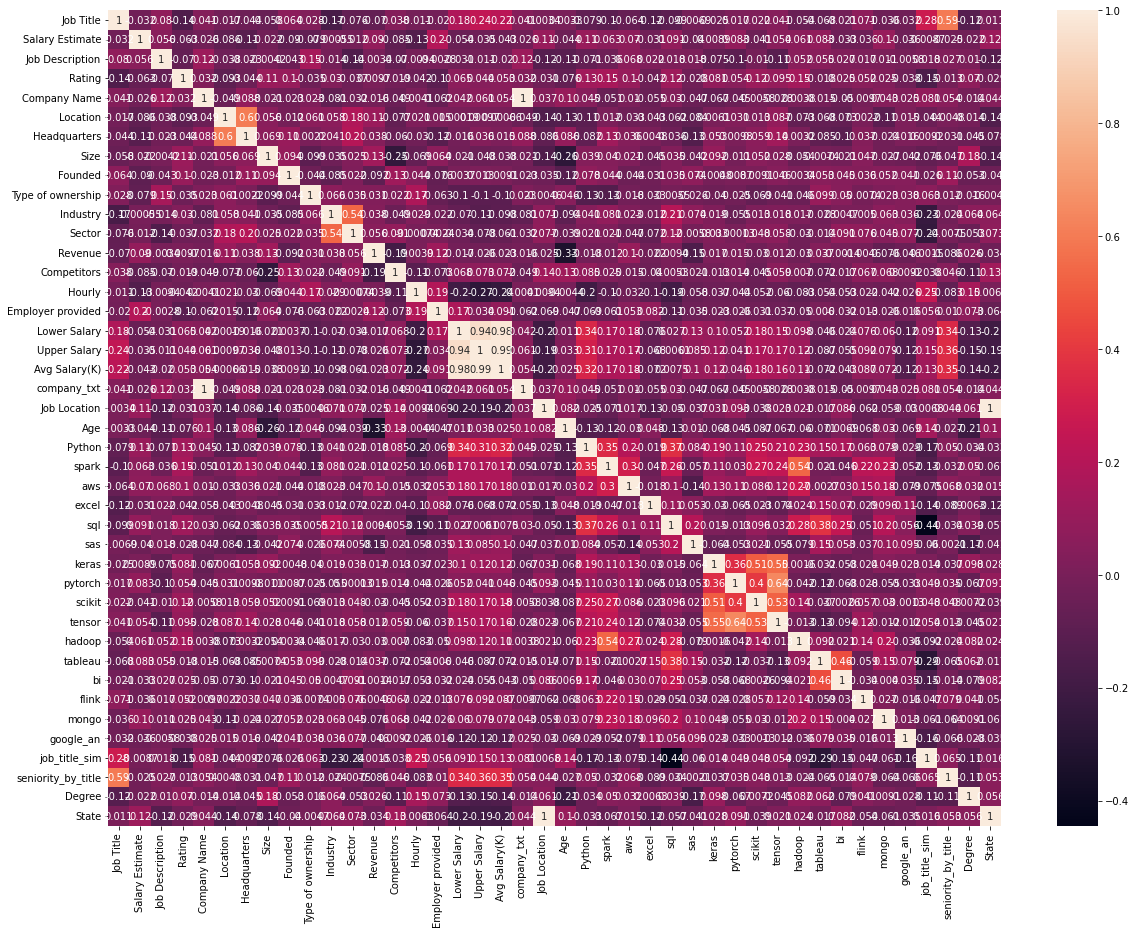

In [236]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [237]:
X = df.drop(columns=['Avg Salary(K)','Founded', 'Job Description', 'Headquarters', 'Location'
                     , 'Size', 'Employer provided', 'company_txt', 'Competitors', 'job_title_sim'])
X

,Job Title,Salary Estimate,Rating,Company Name,Type of ownership,Industry,Sector,Revenue,Hourly,Lower Salary,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,seniority_by_title,Degree,State
0,68,180,3.8,289,1,2,1,9,0,53,...,0,0,1,1,0,0,0,1,0,23
1,105,235,3.4,315,6,27,11,5,0,63,...,0,0,0,0,0,0,0,1,0,16
2,68,339,4.8,163,1,45,5,4,0,80,...,0,0,0,0,0,0,0,1,0,7
3,68,198,3.8,213,3,17,18,10,0,56,...,0,0,0,0,0,0,0,1,2,35
4,68,370,2.9,12,1,1,5,12,0,86,...,0,0,0,0,0,0,0,1,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,229,205,3.9,129,2,7,4,3,0,58,...,0,0,0,0,0,0,0,2,0,17
738,189,292,4.4,111,2,33,12,4,0,72,...,0,1,0,0,0,0,0,2,2,31
739,155,196,2.6,266,0,9,8,12,0,56,...,0,0,0,0,0,0,0,1,1,28
740,66,397,3.2,203,1,48,5,8,0,95,...,0,0,0,0,0,0,0,1,2,28


In [238]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 741
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           732 non-null    int64  
 1   Salary Estimate     732 non-null    int64  
 2   Rating              732 non-null    float64
 3   Company Name        732 non-null    int64  
 4   Type of ownership   732 non-null    int64  
 5   Industry            732 non-null    int64  
 6   Sector              732 non-null    int64  
 7   Revenue             732 non-null    int64  
 8   Hourly              732 non-null    int64  
 9   Lower Salary        732 non-null    int64  
 10  Upper Salary        732 non-null    int64  
 11  Job Location        732 non-null    int64  
 12  Age                 732 non-null    float64
 13  Python              732 non-null    int64  
 14  spark               732 non-null    int64  
 15  aws                 732 non-null    int64  
 16  excel   

In [239]:
df[['Job Title','Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location' ,'Headquarters', 'Size','Avg Salary(K)']]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Avg Salary(K)
0,68,180,124,3.8,289,3,71,5,72.0
1,105,235,433,3.4,315,99,11,1,87.5
2,68,339,211,4.8,163,42,42,5,85.0
3,68,198,8,3.8,213,154,147,2,76.5
4,68,370,123,2.9,12,122,116,6,114.5
...,...,...,...,...,...,...,...,...,...
737,229,205,346,3.9,129,30,24,1,84.5
738,189,292,362,4.4,111,119,156,2,102.5
739,155,196,366,2.6,266,141,134,5,73.5
740,66,397,121,3.2,203,7,34,0,127.5


In [240]:
# for column in X.columns:
#     if X[column].dtype == type(object):
#         le = sklearn.preprocessing.LabelEncoder()
#         X[column] = le.fit_transform(X[column])
# X.tail()

In [241]:
X = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(X), columns=X.columns)
y = df['Avg Salary(K)']

In [242]:
y

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg Salary(K), Length: 732, dtype: float64

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=666)

In [244]:

import statsmodels.api as sm
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import pickle

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [245]:
%%time
LIR = LinearRegression()
DTR = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators = 100, random_state=555)
KNR = KNeighborsRegressor()
# XGB = XGBRegressor(n_estimators = 100, seed=666, eval_metric='logloss')
XGB = XGBRegressor()
reg_cv = GridSearchCV(XGB, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [100,500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)
XGB = XGBRegressor(**reg_cv.best_params_)
clfs = []
print('\nBest Parameter: ', reg_cv.best_params_)
print('\n5-fold cross validation:\n')
for clf, label in zip([LIR, DTR, RF, KNR, XGB],
                      ['Linear Regression',
                       'Decision Tree Regressor',
                       'Random Forest',
                       'KNeighbors',
                       'XGBoost'
                      ]):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="r2")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (clf.score(X_test, y_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best Parameter:  {'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 1.0, 'n_estimators': 1000}

5-fold cross validation:

Train CV Accuracy: 1.000 (+/- 0.000) [Linear Regression]
Test Accuracy: 1.0000 
Train CV Accuracy: 0.992 (+/- 0.005) [Decision Tree Regressor]
Test Accuracy: 0.9961 
Train CV Accuracy: 0.996 (+/- 0.001) [Random Forest]
Test Accuracy: 0.9990 
Train CV Accuracy: 0.770 (+/- 0.042) [KNeighbors]
Test Accuracy: 0.6606 
Train CV Accuracy: 0.998 (+/- 0.001) [XGBoost]
Test Accuracy: 0.9977 
CPU times: user 1min 45s, sys: 44.2 s, total: 2min 29s
Wall time: 21.9 s


In [246]:
pred = clf.predict(X_test)
pred

array([139.00092 ,  60.78388 ,  83.99951 ,  70.499916, 108.50832 ,
       143.49896 , 104.49969 , 108.06825 ,  52.279434,  90.08191 ,
        62.497437,  52.279434, 103.497925, 117.500534, 116.49903 ,
        76.50205 ,  70.50194 ,  48.06674 , 129.49857 ,  99.50278 ,
        98.00058 ,  52.499546,  38.88068 ,  47.41861 ,  85.38353 ,
       139.0011  , 112.89473 , 157.1749  , 107.50139 , 154.99977 ,
       107.243225, 160.56512 ,  80.87065 ,  93.50106 , 163.69774 ,
        92.1786  ,  89.30244 , 100.99829 ,  66.49871 ,  99.06912 ,
       167.50334 ,  88.83423 , 161.50003 , 100.04078 , 123.31002 ,
       153.00493 ,  90.49603 ,  90.183395, 139.49904 ,  54.670013,
        72.49963 ,  54.00012 ,  86.36403 , 106.5014  ,  75.501816,
        94.498924,  73.00036 , 139.49919 , 157.1749  ,  53.503006,
       139.49904 ,  84.99173 ,  42.99901 ,  56.448147, 224.99982 ,
       138.49884 , 169.00034 ,  81.90877 ,  48.500015, 147.00108 ,
       120.99901 , 182.34424 ,  80.50562 , 106.99884 , 140.499

In [252]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  1.774304


In [253]:
clfs[2]

RandomForestRegressor(random_state=555)

In [248]:
y_test.head(30)

630    139.0
477     59.5
23      84.0
388     70.5
525    109.0
423    143.5
508    104.5
264    109.0
381     51.5
700     89.0
580     62.5
572     51.5
393    103.5
725    117.5
661    116.5
308     76.5
307     70.5
90      48.0
561    129.5
358     99.5
97      99.0
339     52.5
719     37.5
562     47.0
635     85.5
86     139.0
656    114.0
342    154.5
593    107.5
373    155.0
Name: Avg Salary(K), dtype: float64

In [254]:
filename = 'DS_Jobs.pkl'
outfile = open(filename,'wb')
filename1 = 'RF_DS_Jobs.pkl'
outfile1 = open(filename1,'wb')

In [255]:
pickle.dump(clf,outfile)
outfile.close()
pickle.dump(clfs[2],outfile1)
outfile1.close()

In [256]:
pickled_model = pickle.load(open('DS_Jobs.pkl', 'rb'))
pickled_model.predict(X_test)

array([139.00092 ,  60.78388 ,  83.99951 ,  70.499916, 108.50832 ,
       143.49896 , 104.49969 , 108.06825 ,  52.279434,  90.08191 ,
        62.497437,  52.279434, 103.497925, 117.500534, 116.49903 ,
        76.50205 ,  70.50194 ,  48.06674 , 129.49857 ,  99.50278 ,
        98.00058 ,  52.499546,  38.88068 ,  47.41861 ,  85.38353 ,
       139.0011  , 112.89473 , 157.1749  , 107.50139 , 154.99977 ,
       107.243225, 160.56512 ,  80.87065 ,  93.50106 , 163.69774 ,
        92.1786  ,  89.30244 , 100.99829 ,  66.49871 ,  99.06912 ,
       167.50334 ,  88.83423 , 161.50003 , 100.04078 , 123.31002 ,
       153.00493 ,  90.49603 ,  90.183395, 139.49904 ,  54.670013,
        72.49963 ,  54.00012 ,  86.36403 , 106.5014  ,  75.501816,
        94.498924,  73.00036 , 139.49919 , 157.1749  ,  53.503006,
       139.49904 ,  84.99173 ,  42.99901 ,  56.448147, 224.99982 ,
       138.49884 , 169.00034 ,  81.90877 ,  48.500015, 147.00108 ,
       120.99901 , 182.34424 ,  80.50562 , 106.99884 , 140.499

In [258]:
pickled_model1 = pickle.load(open('RF_DS_Jobs.pkl', 'rb'))
pickled_model1.predict(X_test)

array([139.355,  59.72 ,  83.855,  70.48 , 109.33 , 143.485, 105.305,
       107.775,  50.895,  88.5  ,  62.72 ,  50.895, 104.   , 118.04 ,
       115.81 ,  76.545,  70.66 ,  48.175, 129.79 ,  99.57 ,  98.61 ,
        52.65 ,  41.03 ,  47.435,  86.32 , 139.075, 113.535, 150.685,
       107.66 , 152.63 , 108.98 , 165.885,  80.985,  93.415, 164.48 ,
        92.735,  89.595, 100.945,  66.675, 101.3  , 167.45 ,  86.9  ,
       161.01 , 100.735, 124.175, 153.28 ,  90.605,  92.085, 139.56 ,
        53.705,  72.27 ,  54.04 ,  87.195, 106.595,  75.46 ,  94.835,
        72.955, 139.585, 150.685,  53.29 , 139.56 ,  84.935,  42.78 ,
        56.635, 219.12 , 138.475, 169.185,  81.075,  48.545, 146.6  ,
       120.18 , 171.965,  80.695, 107.35 , 140.19 ,  77.175, 111.435,
        65.205, 106.99 , 101.73 ,  90.23 , 102.48 , 114.62 ,  66.235,
        96.965, 124.01 , 218.17 , 151.7  , 100.02 ,  85.67 , 140.77 ,
        99.025,  92.885, 120.   ,  52.65 ,  91.945, 139.53 , 136.83 ,
       100.405,  44.